In [1]:
#This notebook created plots for my AAS 235 presentation

In [1]:
from pixell import enmap, enplot, reproject
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
import healpy as hp
from astropy.io import fits
from astropy.wcs import WCS


In [2]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

In [3]:
image = '/home/gonzalo/Desktop/polarizedmastermaps/mastermapbeamcorVnewd.fits'
hdu = fits.open(image)

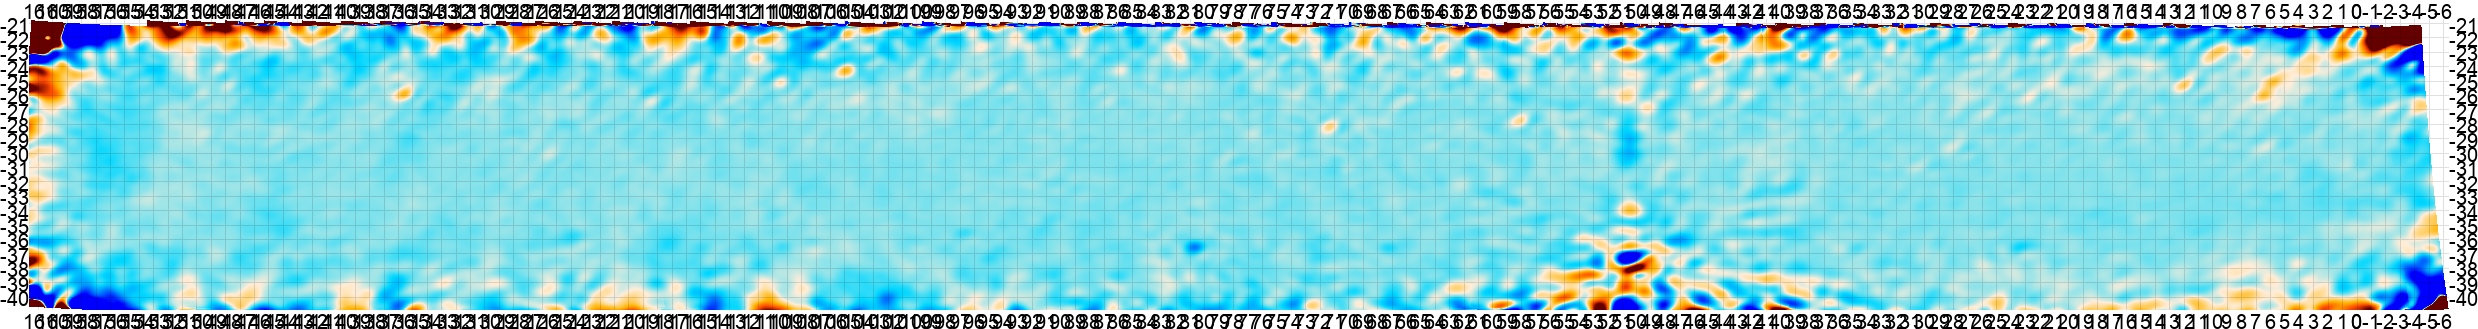

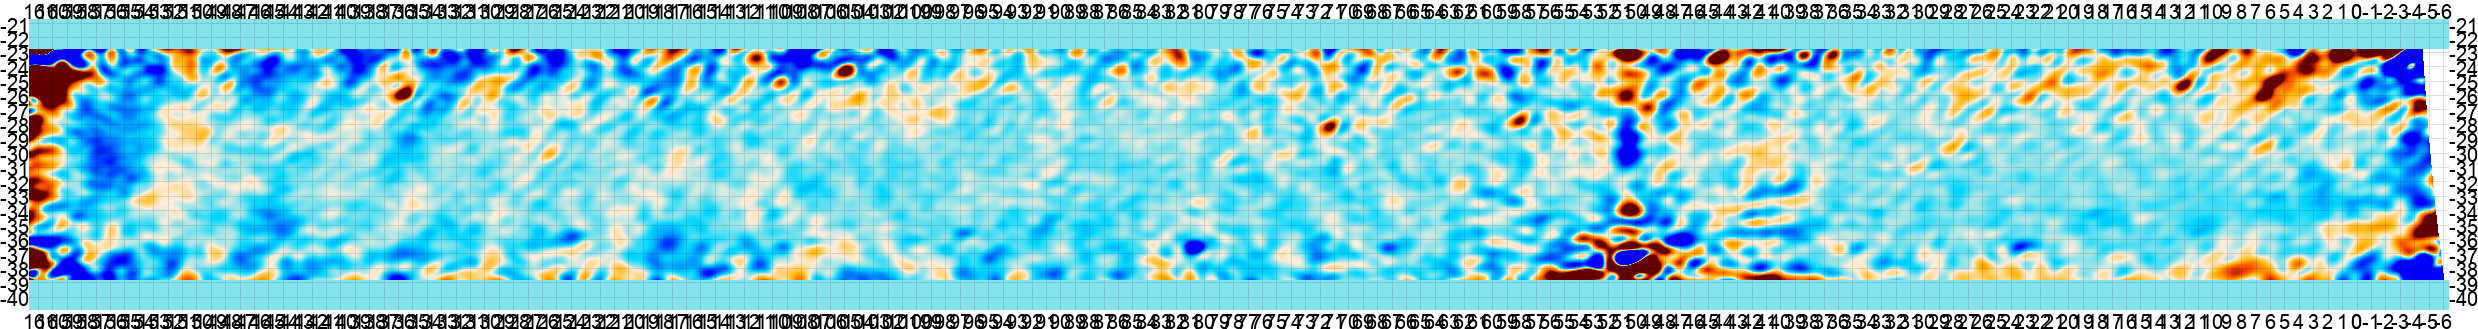

In [4]:
Imosaic = enmap.read_map(image)
eshow(Imosaic)

Imosaic[0:30][:] = 0
Imosaic[-30:][:] = 0
eshow(Imosaic)
Imosaic[:][0:20] = 0
Imosaic[:][-20:] = 0


In [6]:
#path = '/Users/jaguirre/Data/Mosaics/Updated_mosaics/'
filename = 'mastermapbeamcorInewd.fits'



In [7]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

In [8]:
Imosaic = enmap.read_map(filename)
#Imosaic = Imosaic[(Imosaic != np.nan)]


In [9]:
Imosaic[~np.isfinite(Imosaic)] = 0.

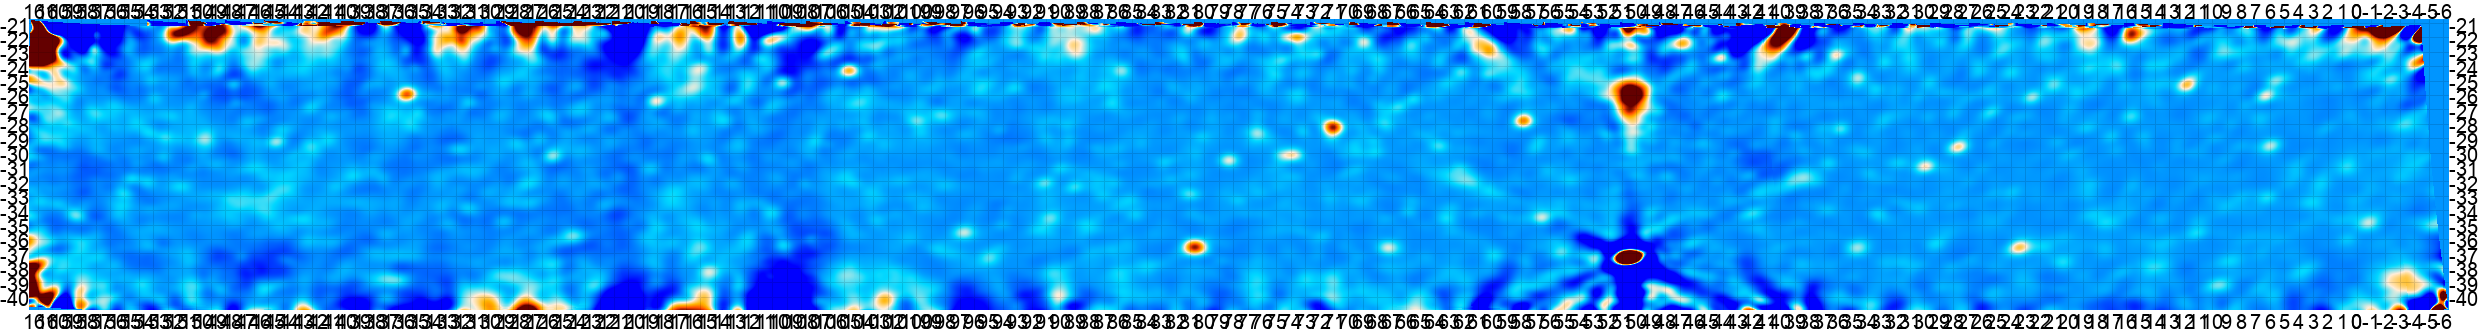

In [10]:
eshow(Imosaic,max=50,min=-15)

In [11]:
gsm = reproject.enmap_from_healpix("GSM150MHz.fits", Imosaic.shape, Imosaic.wcs)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


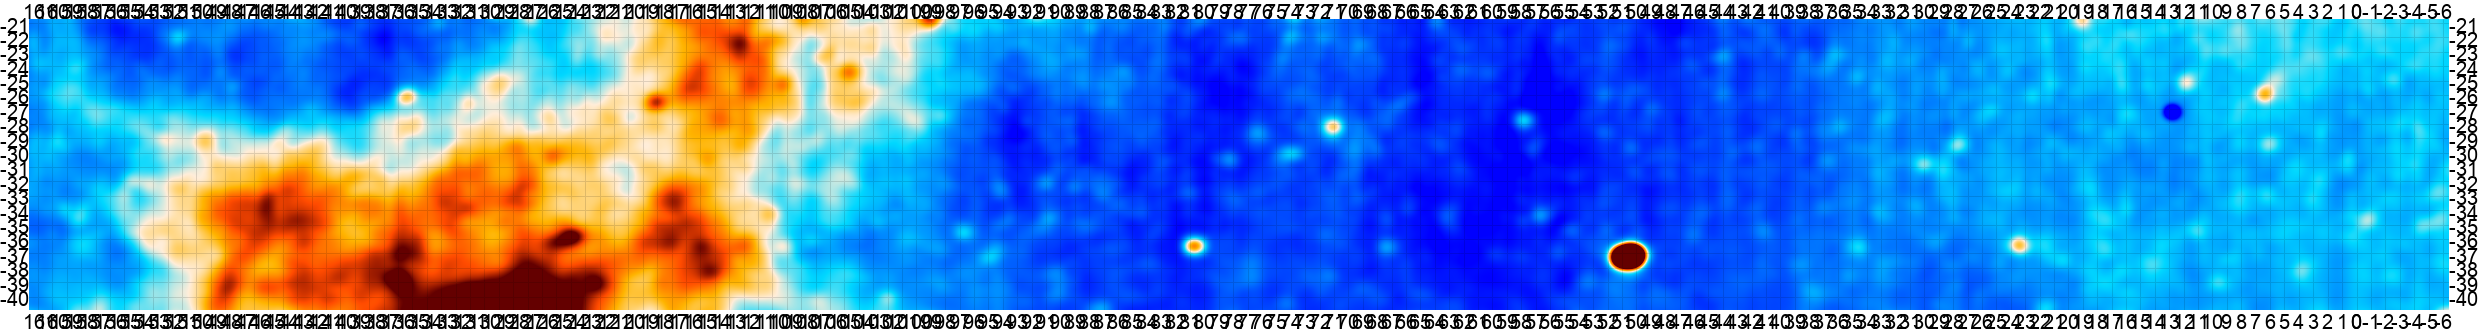

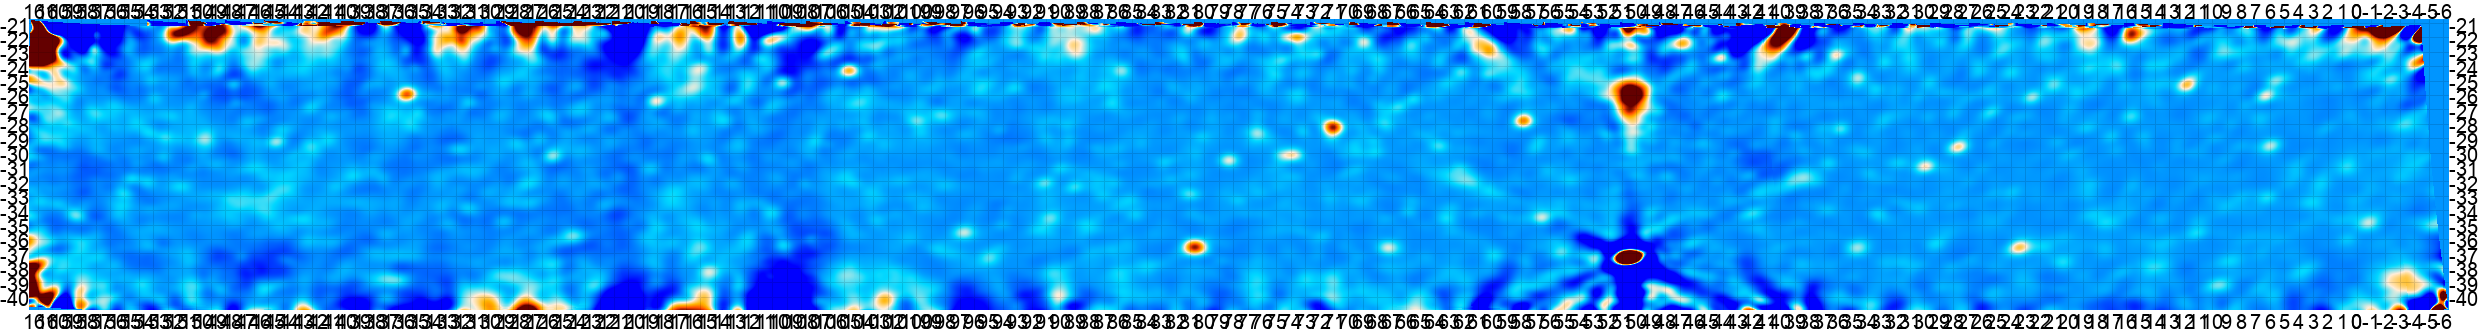

In [12]:
eshow(gsm)
eshow(Imosaic,max=50,min=-15)


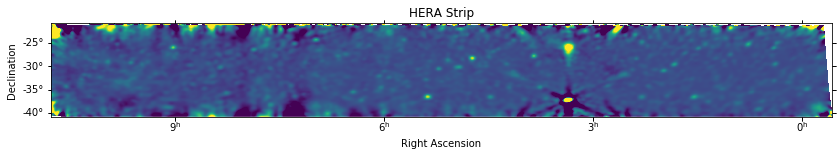

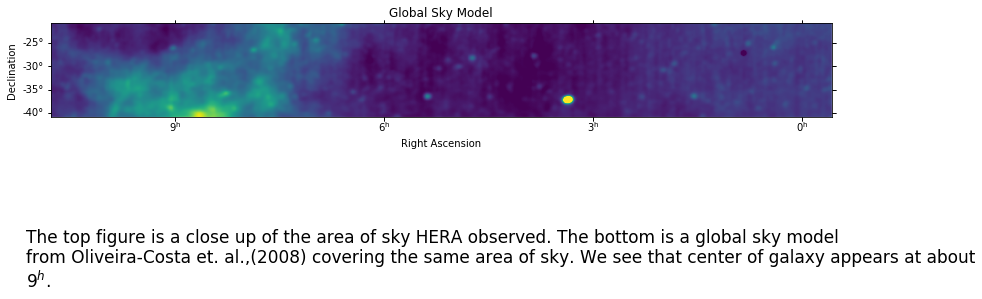

In [14]:
plt.figure(figsize=(14,10))
hdu = fits.open('mastermapbeamcorInewd.fits')
data = hdu[0].data
wcs = WCS(hdu[0].header)
plt.subplot(projection=wcs)
plt.imshow(data, vmin=-15, vmax=50, origin='lower')
plt.title('HERA Strip')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.savefig('HERA Strip.png')
plt.figure(figsize=(14,10))
hdu = fits.open('GSM_HERA_stripe.fits')
data = hdu[0].data[0]
wcs = WCS(hdu[0].header,naxis=2)
plt.subplot(projection=wcs)
plt.imshow(data,vmin=150,vmax=700,origin='lower')
plt.title('Global Sky Model')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')

plt.rcParams.update({'font.size': 17})
txt = """The top figure is a close up of the area of sky HERA observed. The bottom is a global sky model
from Oliveira-Costa et. al.,(2008) covering the same area of sky. We see that center of galaxy appears at about
$9^{h}$."""
plt.figtext(0.1,0.2,txt)
plt.savefig('Global Sky Model Strip.png')


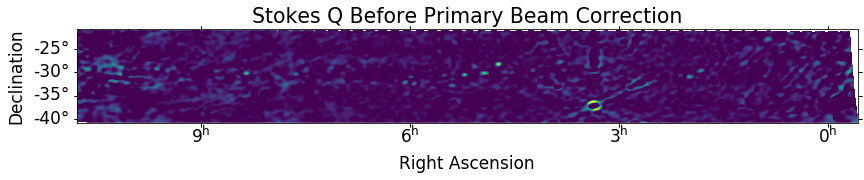

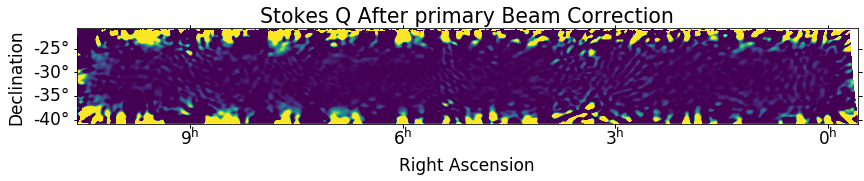

In [15]:
plt.figure(figsize=(14,12))
hdu = fits.open('/home/gonzalo/Desktop/presentation/dirty_mosiac_mean/mastermap_nanmeanQ.fits')
data = hdu[0].data
wcs = WCS(hdu[0].header,naxis=2)
plt.subplot(projection=wcs)
plt.imshow(data,vmin=0,vmax=.5)
plt.title('Stokes Q Before Primary Beam Correction')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.savefig('Beamcor.png')

plt.figure(figsize=(14,12))
hdu = fits.open('/home/gonzalo/Desktop/presentation/mastermapbeamcorQnew.fits')
data = hdu[0].data
wcs = WCS(hdu[0].header,naxis=2)
plt.subplot(projection=wcs)
plt.imshow(data,vmin=0,vmax=2)
plt.title('Stokes Q After primary Beam Correction')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.savefig('Notbeamcor.png')

In [16]:
gsm = reproject.enmap_from_healpix("GSM150MHz.fits", Imosaic.shape, Imosaic.wcs)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


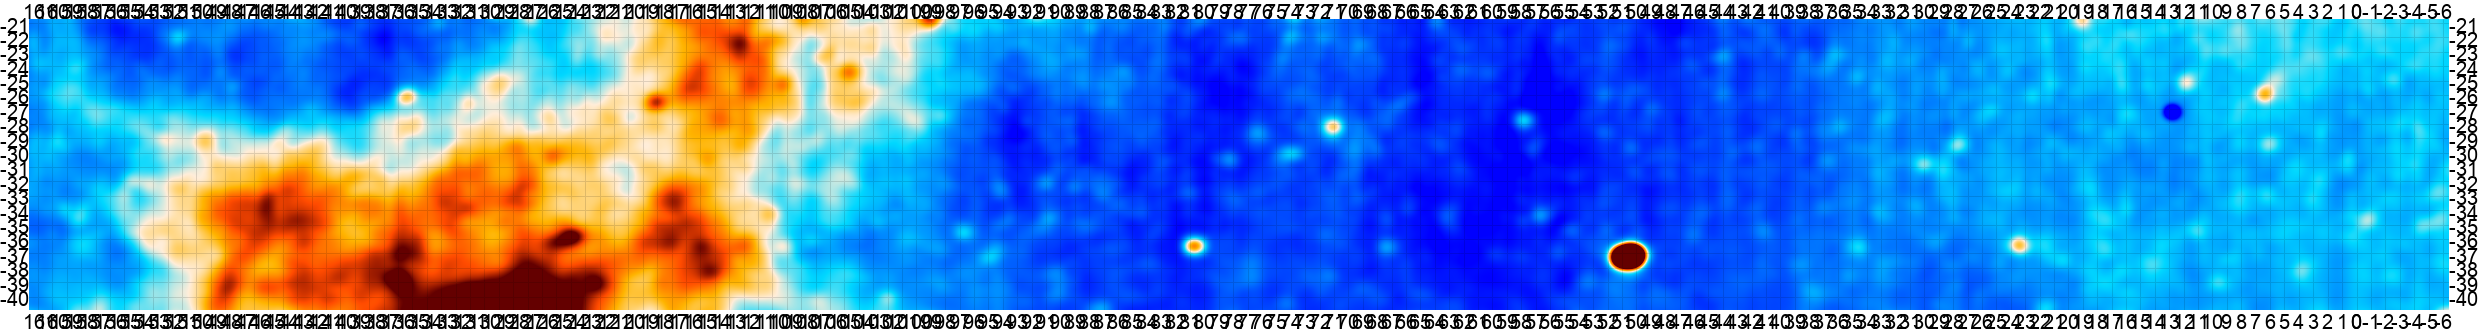

In [17]:
eshow(gsm)

In [18]:
gsm.write('GSM_HERA_stripe.fits')

In [19]:
Imosaic_hp = reproject.healpix_from_enmap_interp(Imosaic)

In [20]:
Imosaic_hp_nan = Imosaic_hp
Imosaic_hp_nan[Imosaic_hp == 0] = np.nan

/home/gonzalo/anaconda3/envs/hera/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/gonzalo/anaconda3/envs/hera/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/gonzalo/anaconda3/envs/hera/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/gonzalo/anaconda3/envs/hera/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/gonzalo/anaconda3/envs/hera/lib/python3.7/site-packages/healpy/projaxes.py:11

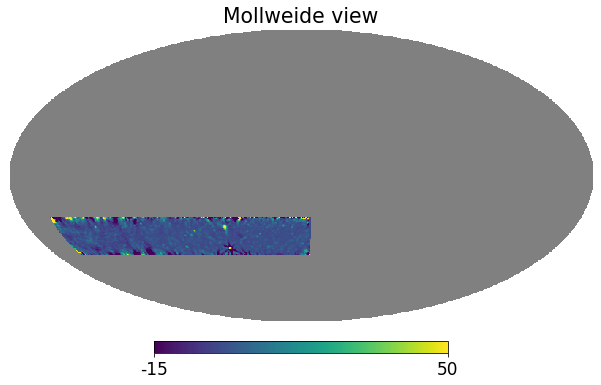

In [21]:
hp.mollview(Imosaic_hp, min=-15, max=50)

In [22]:
gsm_hp = hp.read_map('GSM150MHz.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


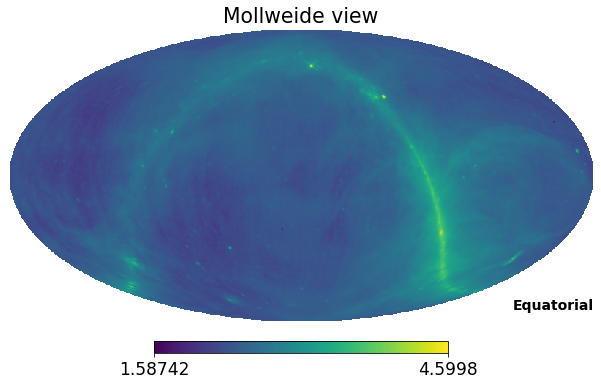

In [23]:
hp.mollview(np.log10(gsm_hp),coord=['G','C'])

In [24]:
# How do I get the GSM actually into equatorial coordinates?  Interestingly, pyGSM doesn't seem to provide the option.
# Neither does healpy.  But I wrote something that does.
def rotate_healpix_map(hpmap, rot=None, coord=None):
    """ Will rotate the pixels of a map into (effectively) a new ordering representing a rotation of the function.  
    Not sure why this isn't implemented in healpy directly (maybe it is).  
    In order to map each pixel exactly to a new one, the transform is only accurate to the pixel size.  """
    
    npix = len(hpmap)
    nside = hp.npix2nside(npix)
    
    rotmap = np.zeros(npix)
    ipix = np.arange(npix)
    t,p = hp.pix2ang(nside,ipix)

    if (rot is not None and coord is None):
        r = hp.Rotator(rot=rot)
    if (coord is not None and rot is None):
        r = hp.Rotator(coord=coord)
    
# For each pixel in the new map, find where it would have come 
# from in the old    
    trot,prot = r(t,p)
    ipix_rot = hp.ang2pix(nside,trot,prot)
    
    rotmap = hpmap[ipix_rot]
    
    return rotmap

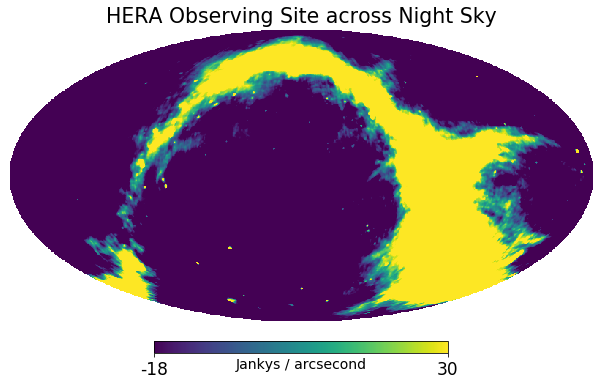

In [31]:
gsm_hp_eq = rotate_healpix_map(gsm_hp, coord=['C','G'])
# Why can't I get this to work?
rescale_gsm = (gsm_hp_eq - gsm_hp_eq.mean())/3.
hp.mollview(rescale_gsm, min=-18, max=30,title='HERA Observing Site across Night Sky',unit='Jankys / arcsecond')
plt.savefig('yahs.png')


In [26]:
Imosaic_hp_nan = Imosaic_hp.copy()
Imosaic_hp_nan[Imosaic_hp == 0] = np.nan

In [27]:
thefuck = np.isnan(Imosaic_hp_nan)
gsm_plus_hera = Imosaic_hp_nan.copy() - 15.
gsm_plus_hera[thefuck] = rescale_gsm[thefuck] #-45. #(gsm_hp_eq[np.isnan(Imosaic_hp_nan)] - gsm_hp_eq.mean())/3.

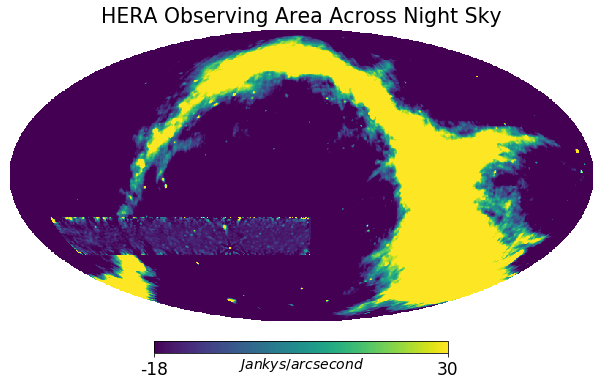

In [28]:
hp.mollview(gsm_plus_hera, min=-18, max = 30, title='HERA Observing Area Across Night Sky',unit='$Jankys / arcsecond$')
#plt.savefig('wo.png')
